In [1]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image
import requests
import numpy as np
from matplotlib import pyplot as plt
from detectron2.utils.visualizer import Visualizer

In [3]:
import os
import cv2

In [4]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    revision="fp16",
    torch_dtype=torch.float16,
)
pipe.to('cuda')

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
/home/jacklishufan/.local/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


StableDiffusionInpaintPipeline {
  "_class_name": "StableDiffusionInpaintPipeline",
  "_diffusers_version": "0.17.1",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "DDIMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [5]:
current_folder = globals()['_dh'][0]
print(current_folder)
os.chdir(os.path.join(current_folder, '..'))

/home/jacklishufan/uninext-segm/notebooks


In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
from projects.HIPIE.demo_lib.part_segm_demo import PartSegmDemo
from detectron2.data.detection_utils import read_image,convert_PIL_to_numpy

In [8]:
config_file = 'projects/HIPIE/configs/image_joint_r50_pan_maskdino_parts.yaml'
ckpt = 'weights/r50_parts.pth'
uninext_demo = PartSegmDemo(config_file=config_file,weight=ckpt)

Some weights of the model checkpoint at projects/HIPIE/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'bert.pooler.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


MASK_DINO has some weights not loaded, typically these are only predication and mask heads:_IncompatibleKeys(missing_keys=['pixel_decoder.mask_features.0.weight', 'pixel_decoder.mask_features.0.bias', 'pixel_decoder.mask_features.1.weight', 'pixel_decoder.mask_features.1.bias', 'pixel_decoder.mask_features.3.weight', 'pixel_decoder.mask_features.3.bias', 'pixel_decoder.adapter_1.weight', 'predictor.class_embed.weight', 'predictor.class_embed.bias', 'predictor.resizer.fc.weight', 'predictor.resizer.fc.bias', 'predictor.resizer.layer_norm.weight', 'predictor.resizer.layer_norm.bias', 'predictor._bbox_embed.layers.0.weight', 'predictor._bbox_embed.layers.0.bias', 'predictor._bbox_embed.layers.1.weight', 'predictor._bbox_embed.layers.1.bias', 'predictor._bbox_embed.layers.2.weight', 'predictor._bbox_embed.layers.2.bias', 'predictor.bbox_embed.0.layers.0.weight', 'predictor.bbox_embed.0.layers.0.bias', 'predictor.bbox_embed.0.layers.1.weight', 'predictor.bbox_embed.0.layers.1.bias', 'predic

Some model parameters or buffers are not found in the checkpoint:
detr.mask_dino.predictor.resizer.fc.{bias, weight}
detr.mask_dino.predictor.resizer.layer_norm.{bias, weight}
The checkpoint state_dict contains keys that are not used by the model:
  detr.mask_dino.predictor.label_enc.weight


Length of coco_panoptic Categories : 133
Length of pascal_parts_val Categories : 200
Length of coco_2017_train_panoptic_with_sem_seg Categories : 133


In [9]:
url = 'https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png'
image = Image.open(requests.get(url,stream=True).raw)
image_np_d2 = convert_PIL_to_numpy(image, format="BGR")

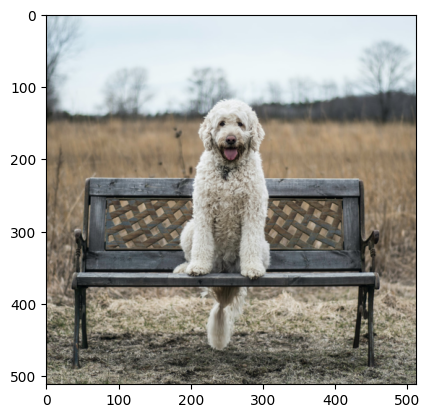

In [16]:
image = image.crop((0,0,image.width,image.width)).resize((512,512))
plt.imshow(image)

In [13]:
image_np_d2 = convert_PIL_to_numpy(image, format="BGR")

In [14]:
mask = uninext_demo.foward_reference(image_np_d2,"the dog","head",use_coarse=True)

/home/jacklishufan/uninext-segm/projects/HIPIE/hipie/models/deformable_detr/position_encoding.py:49: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)
/home/jacklishufan/miniconda3/envs/uninext/lib/python3.10/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484803030/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/home/jacklishufan/miniconda3/envs/uninext/lib/python3.10/site-

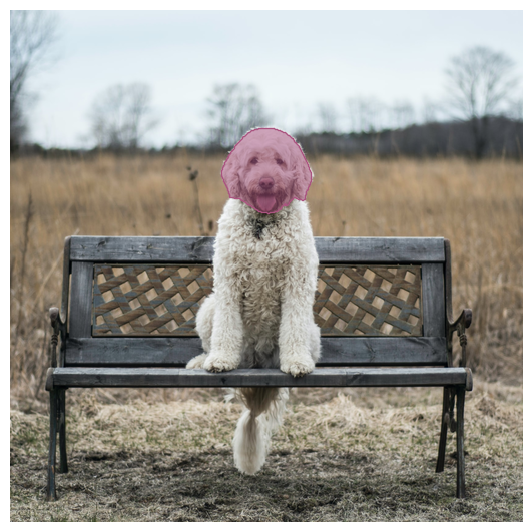

In [17]:
vis= Visualizer(image)
#vis.overlay_instances(masks=mask['instance_mask'])
#vis.overlay_instances(masks=part_mask)
vis.overlay_instances(masks=[mask['final_mask'][0].numpy()])
vis.get_output().fig

In [18]:
img_dilation = mask['final_mask'][0].numpy()
DILATION_SIZE = 20
kernel = np.ones((DILATION_SIZE, DILATION_SIZE), np.uint8)
img_dilation = cv2.dilate(img_dilation, kernel, iterations=1)
#plt.imshow(img_dilation)

In [19]:
def resize(img,mask,tgt_size=(512,512)):
    new_img = image.resize(tgt_size)
    mask = torch.tensor(mask)[None,None,]
    mask = torch.nn.functional.interpolate(mask,tgt_size)
    return new_img,mask[0][0].numpy()

In [20]:
mask_image = img_dilation

In [21]:
img_resized,mask_resized = resize(image,mask_image)

In [22]:
prompt = "Face of a yellow cat, high resolution"
#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
image_repaint = pipe(prompt=prompt, image=img_resized, mask_image=mask_resized).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

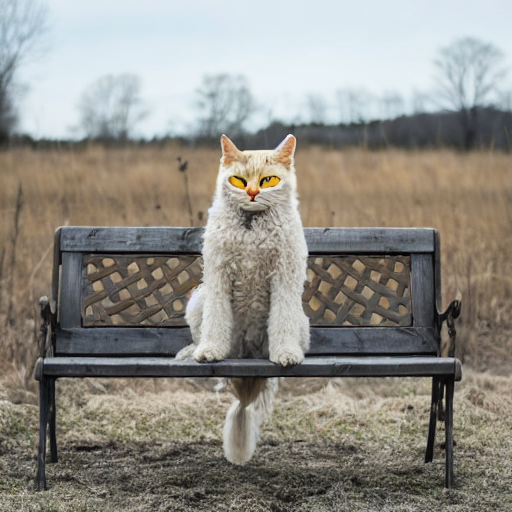

In [23]:
image_repaint